<a href="https://colab.research.google.com/github/liptiavenica/Menjelajahi-Dunia-Machine-Learning/blob/master/Bab%204/A%20-%20Clustering/2%20-%20Agglomerative%20Hierarchical%20Clustering/Praktikum/Praktikum_Agglomerative_Hierarchical_Clustering_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

## Load Dataset

In [41]:
data = pd.read_csv("penguins.csv")
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
data.shape[0]

344

## EDA and Data Preprocessing

In [42]:
#rename columns
data.columns = ['clen', 'cdepth', 'flen', 'weight', 'sex']

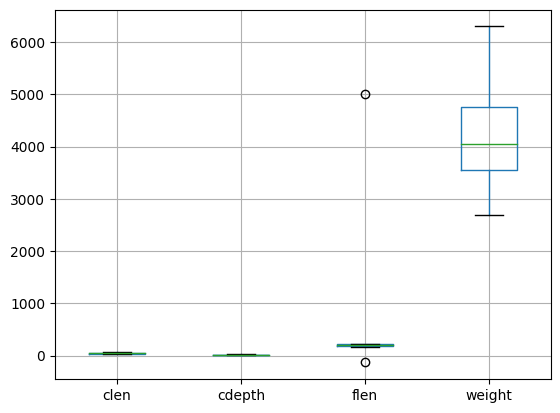

In [43]:
#memeriksa outlier
data.boxplot()
plt.show()

In [44]:
#memeriksa missing value
data.isna().sum()

clen      2
cdepth    2
flen      2
weight    2
sex       9
dtype: int64

In [45]:
# mengubah MALE menjadi 0 dan FEMALE menjadi 1
data['sex'] = data.sex.map({'MALE':0, 'FEMALE':1})
#menghilangkan missing value
data = data.dropna()
#menghilangkan 2 objek outlier
data = data.drop(data[(data['flen'] > 4000 ) | (data['flen'] < 0)].index)
data.describe()

,clen,cdepth,flen,weight,sex
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904,0.496988
std,5.452462,1.960275,14.035971,806.361278,0.500746
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,44.700000,17.300000,197.000000,4025.000000,0.000000
75%,48.625000,18.700000,213.000000,4781.250000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000


## Membuat dendogram

Text(0, 0.5, 'Euclidean distance')

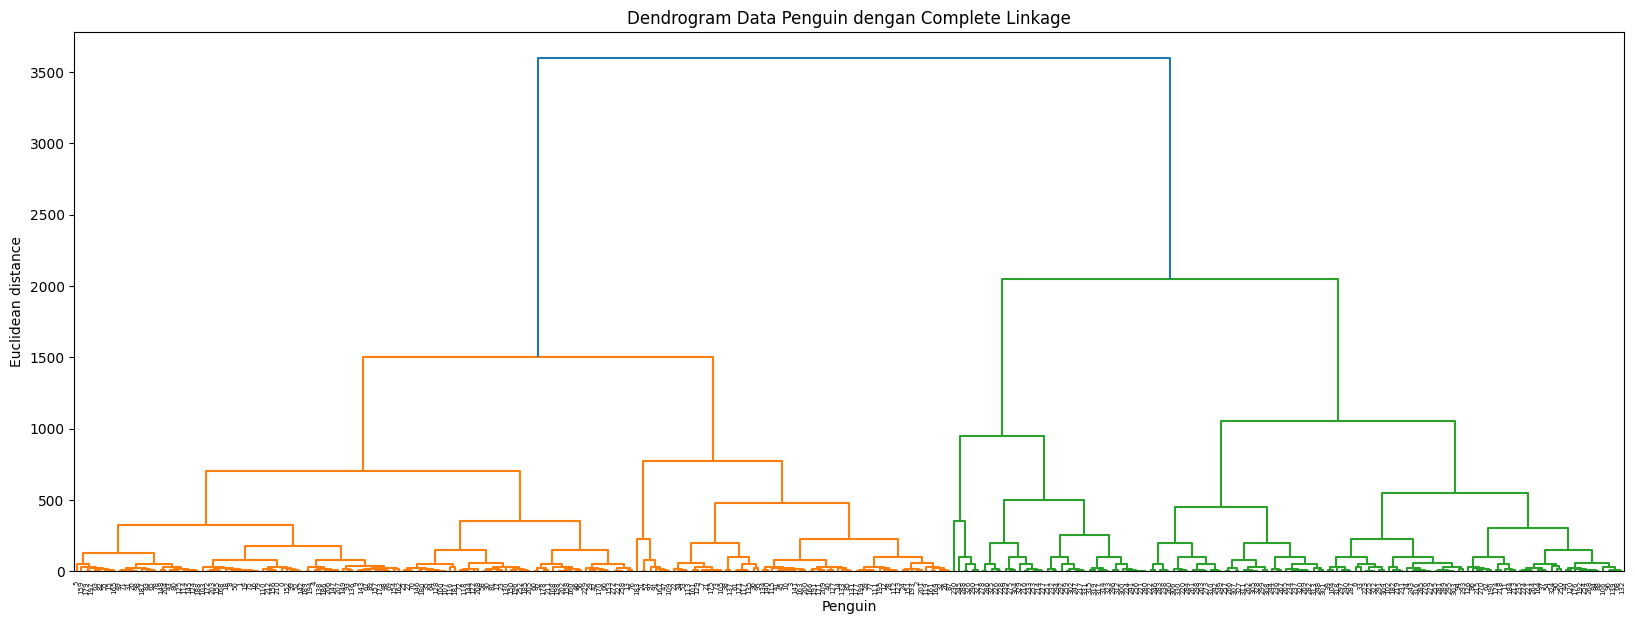

In [46]:
# Plot dendrogram dengan metode complete linkage
plt.figure(figsize=(20, 7))
plt.title("Dendrogram Data Penguin dengan Complete Linkage")

# Create dendrogram
sch.dendrogram(sch.linkage(data, method='complete'))
plt.xlabel('Penguin')
plt.ylabel('Euclidean distance')

Text(0, 0.5, 'Euclidean distance')

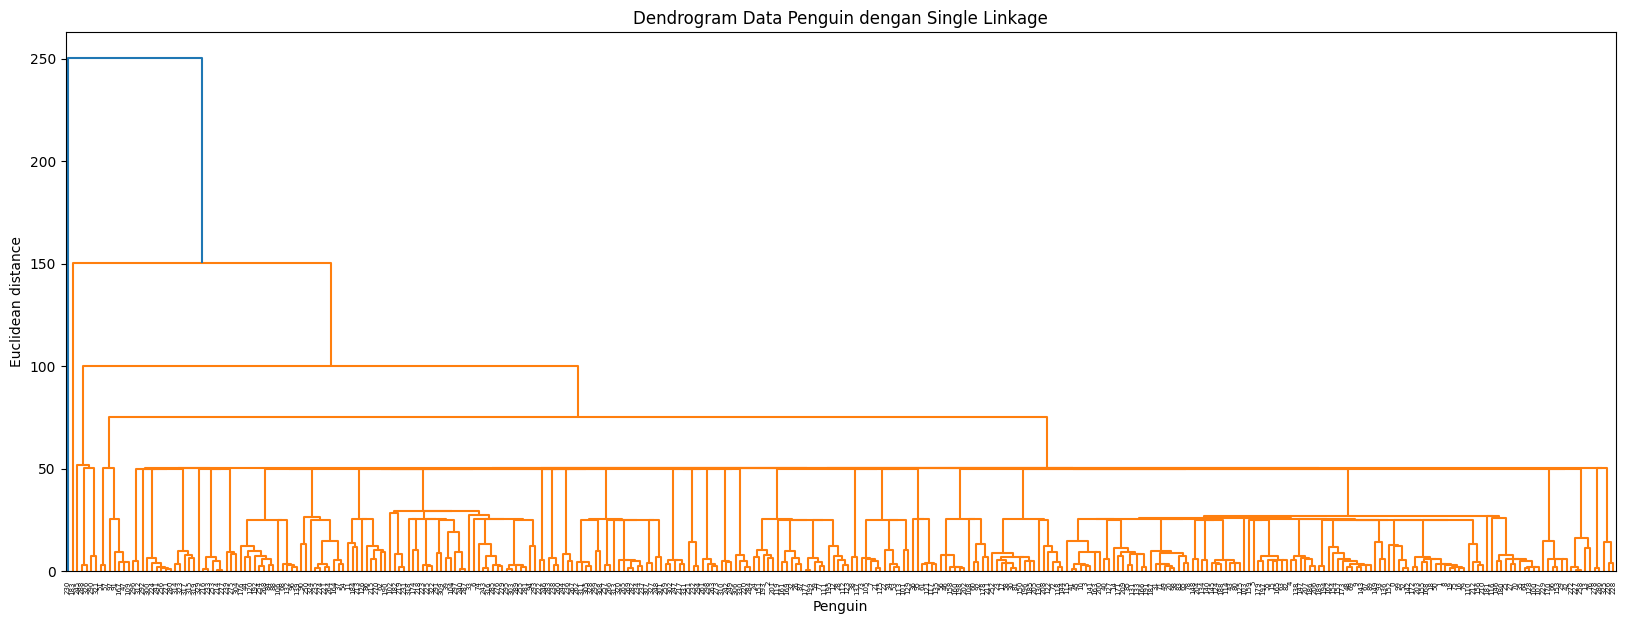

In [11]:
# Plot dendrogram dengan metode single linkage
plt.figure(figsize=(20, 7))
plt.title("Dendrogram Data Penguin dengan Single Linkage")

# Create dendrogram
sch.dendrogram(sch.linkage(data, method='single'))
plt.xlabel('Penguin')
plt.ylabel('Euclidean distance')

Text(0, 0.5, 'Euclidean distance')

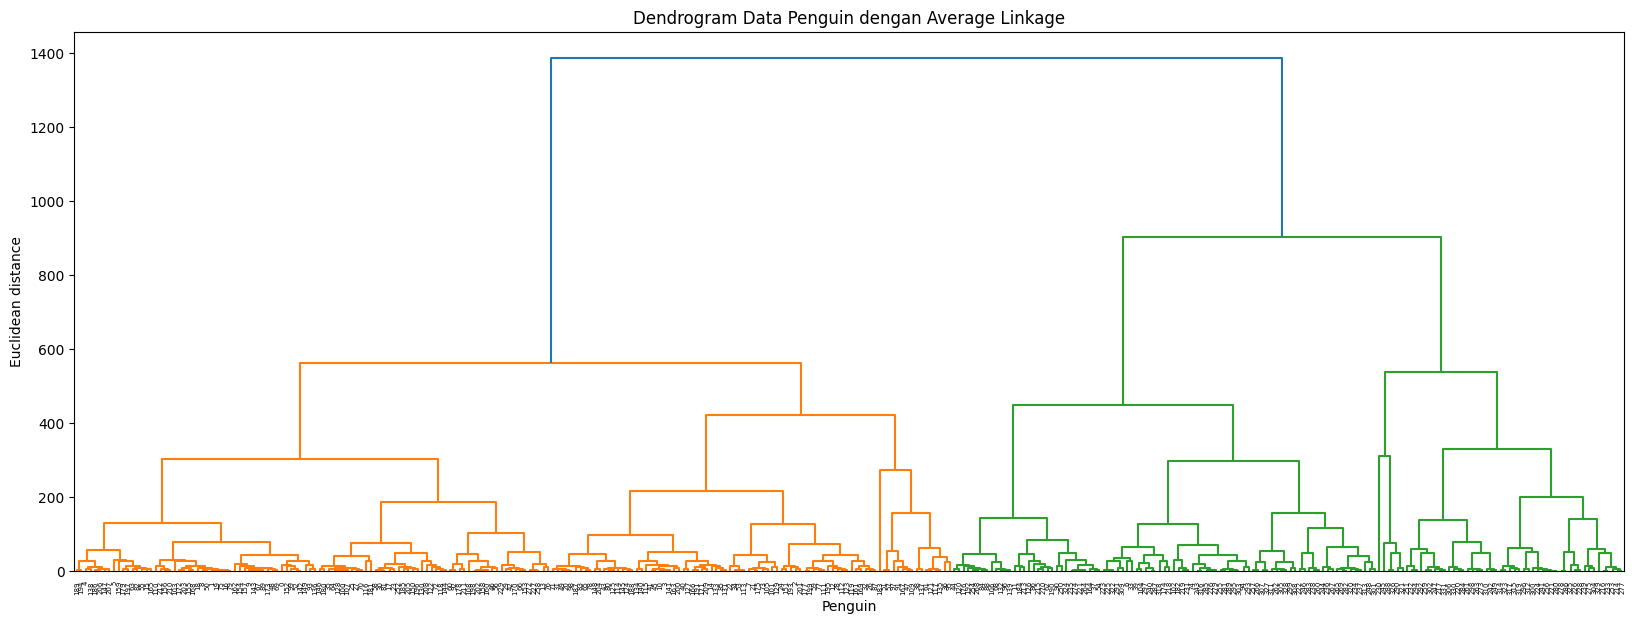

In [12]:
# Plot dendrogram dengan metode average linkage
plt.figure(figsize=(20, 7))
plt.title("Dendrogram Data Penguin dengan Average Linkage")

# Create dendrogram
sch.dendrogram(sch.linkage(data, method='average'))
plt.xlabel('Penguin')
plt.ylabel('Euclidean distance')

## Menentukan jumlah kelompok terbaik

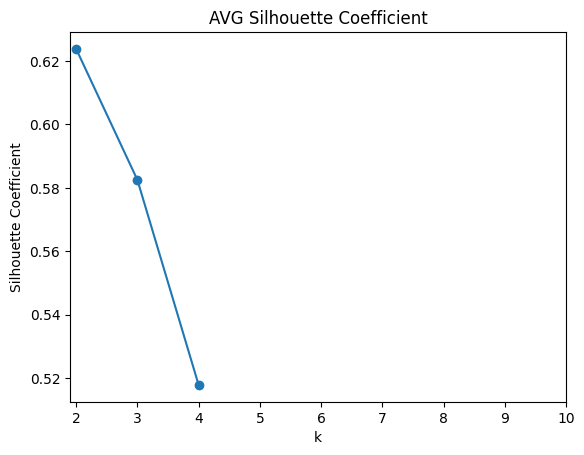

In [18]:
#Dari dendogram yang dihasilkan, data penguin dapat dibagi ke dalam 2 hingga 4 kelompok
#kita clustering gunakan metode complete linkage dengan beberapa jumlah kelompok
#kemudian periksa koefisien silhouettenya
silhouette_coefficients = []
K = range(2,5)
for k in K:
    ahc_model = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='complete')
    ahc_model.fit(data.values)
    score = silhouette_score(data.values, ahc_model.labels_,  metric='euclidean')
    silhouette_coefficients.append(score)

#visualisasi hasil perhitungan koefisien Silhouette
plt.plot(K, silhouette_coefficients, marker= "o")
plt.xlabel('k')
plt.xticks(np.arange(2, 11))
plt.ylabel("Silhouette Coefficient")
plt.title("AVG Silhouette Coefficient")
plt.show()

In [19]:
silhouette_coefficients

[0.6238060463892063, 0.5824970790125858, 0.5178225040404189]

**Diperoleh jumlah kelompok terbaik untuk mengelompokkan data penguin adalah 2**✨

## Clustering dengan jumlah kelompok = 2

In [20]:
# Inisialisasi model dengan 2 cluster
model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')

# Melatih model pada data
model.fit(data.values)

# Menambahkan label cluster pada data
data['cluster'] = model.labels_

## Analisis Pola Cluster

In [21]:
# Print hasil klasterisasi
print("clen")
print(data.groupby('cluster')['clen'].describe())
print("=============")
print("cdepth")
print(data.groupby('cluster')['cdepth'].describe())
print("=============")
print("flen")
print(data.groupby('cluster')['flen'].describe())
print("=============")
print("weight")
print(data.groupby('cluster')['weight'].describe())

clen
         count       mean       std   min     25%   50%     75%   max
cluster                                                              
0        144.0  46.836111  3.926094  37.5  44.325  46.8  49.525  59.6
1        188.0  41.864894  5.482607  32.1  37.600  40.6  46.000  58.0
cdepth
         count       mean       std   min   25%   50%     75%   max
cluster                                                            
0        144.0  15.915972  1.959830  13.1  14.5  15.3  16.850  21.1
1        188.0  18.100532  1.335508  13.5  17.2  18.1  18.925  21.5
flen
         count        mean        std    min    25%    50%    75%    max
cluster                                                                 
0        144.0  213.319444  10.616423  184.0  209.0  215.0  220.0  231.0
1        188.0  191.521277   7.438487  172.0  187.0  191.0  196.0  210.0
weight
         count         mean         std     min     25%     50%     75%  \
cluster                                                  

In [22]:
# Create a crosstab table to see the distribution of sex within each cluster
sex_crosstab = pd.crosstab(data['cluster'], data['sex'])

# Print the crosstab table
print(sex_crosstab)


sex      0.0  1.0
cluster          
0         91   53
1         76  112


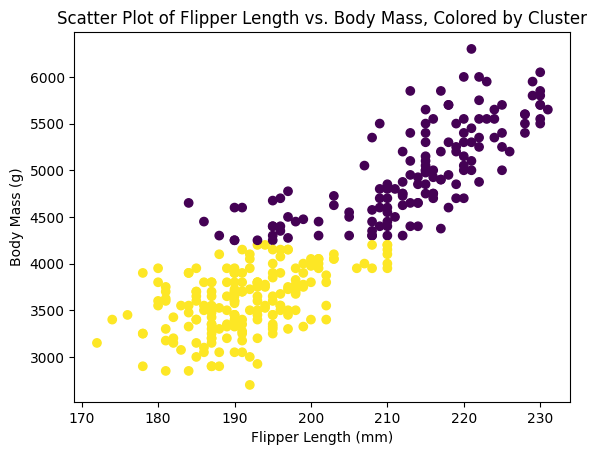

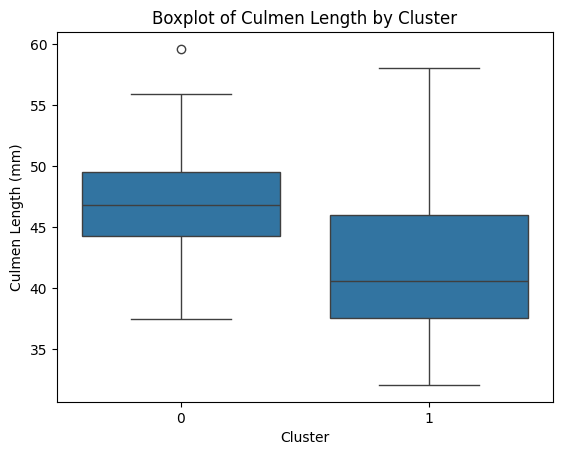

In [23]:
# Further analyze the cluster patterns by visualizing the data using scatter plots or boxplots.

# For example, you can create a scatter plot with different colors for each cluster:

plt.scatter(data['flen'], data['weight'], c=data['cluster'], cmap='viridis')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Scatter Plot of Flipper Length vs. Body Mass, Colored by Cluster')
plt.show()

# You can also create boxplots to visualize the distribution of each feature within each cluster:

sns.boxplot(x='cluster', y='clen', data=data)
plt.xlabel('Cluster')
plt.ylabel('Culmen Length (mm)')
plt.title('Boxplot of Culmen Length by Cluster')
plt.show()


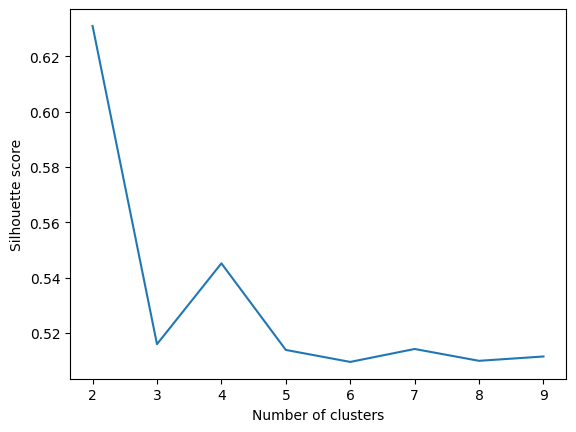

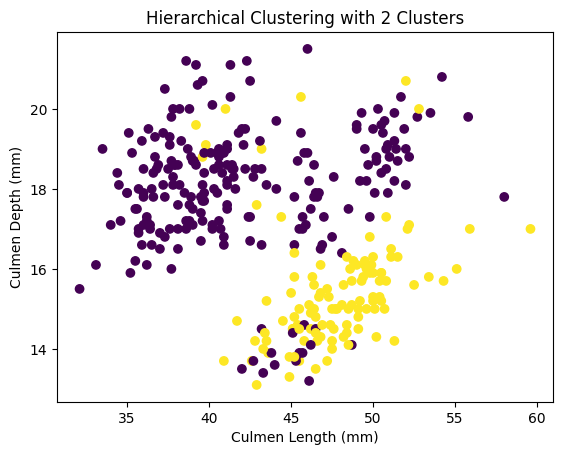

In [47]:
# prompt: data tersebut lebih cocok menggunakan k-means atau hierarchical clustering?

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 10):
  clusterer = AgglomerativeClustering(n_clusters=n_clusters)
  clusterer.fit(data)
  silhouette_scores.append(silhouette_score(data, clusterer.labels_))

# Plot the silhouette scores
plt.plot(range(2, 10), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Choose the number of clusters with the highest silhouette score
best_n_clusters = np.argmax(silhouette_scores) + 2

# Perform hierarchical clustering with the best number of clusters
clusterer_ahc = AgglomerativeClustering(n_clusters=best_n_clusters)
clusterer_ahc.fit(data)

# Visualize the clusters
plt.scatter(data['clen'], data['cdepth'], c=clusterer_ahc.labels_)
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Hierarchical Clustering with {} Clusters'.format(best_n_clusters))
plt.show()
